In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("housing.csv")
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split


X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5217,-118.23,33.95,37.0,2667.0,671.0,2865.0,683.0,0.6831,<1H OCEAN,87500.0
18932,-122.13,38.26,40.0,1538.0,255.0,669.0,263.0,3.3281,NEAR BAY,170200.0
17981,-121.95,37.31,27.0,2462.0,570.0,1278.0,565.0,3.5652,<1H OCEAN,329500.0
14821,-117.11,32.67,52.0,204.0,74.0,248.0,57.0,1.7961,NEAR OCEAN,47500.0
5190,-118.27,33.93,36.0,1467.0,369.0,1247.0,347.0,1.8191,<1H OCEAN,92700.0
...,...,...,...,...,...,...,...,...,...,...
20299,-119.21,34.18,13.0,6103.0,1319.0,2986.0,1212.0,3.9718,NEAR OCEAN,215200.0
15464,-117.23,33.16,2.0,4624.0,946.0,2091.0,808.0,3.6736,NEAR OCEAN,214500.0
6481,-118.05,34.09,23.0,602.0,135.0,409.0,123.0,3.5268,<1H OCEAN,146400.0
19049,-121.83,38.45,36.0,839.0,158.0,446.0,167.0,2.3438,INLAND,122700.0


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

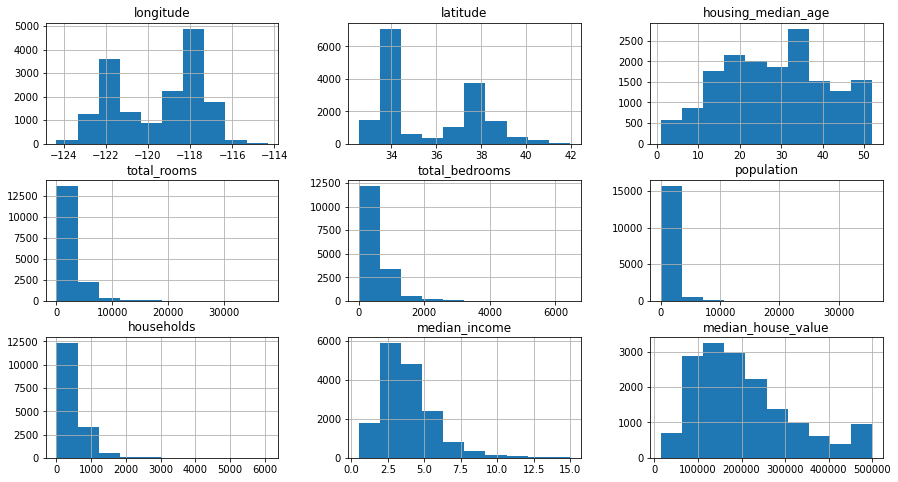

In [8]:
train_data.hist(figsize=(15,8))

<AxesSubplot: >

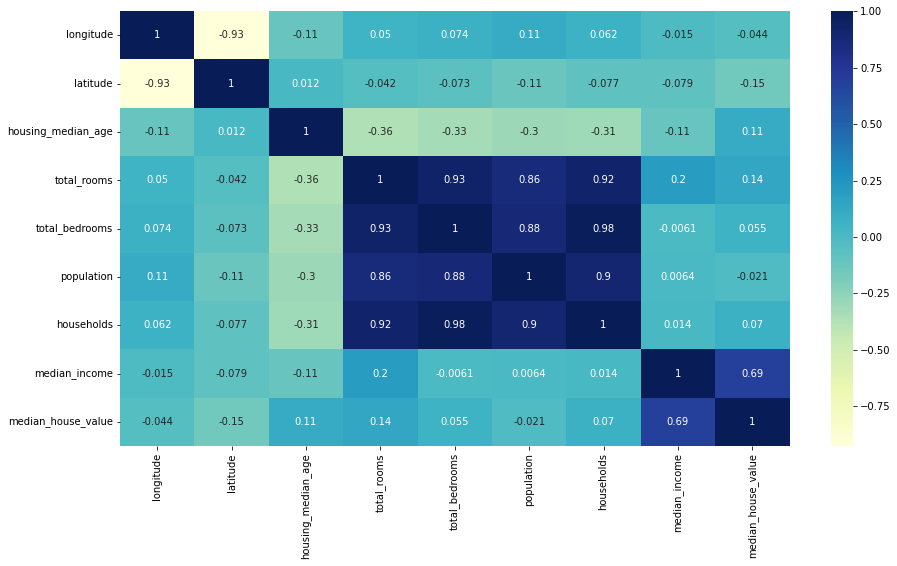

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

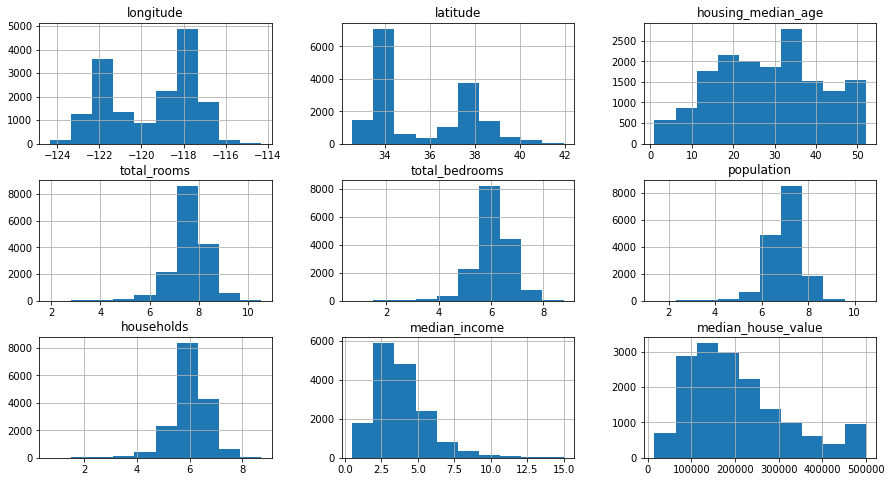

In [13]:
train_data['total_rooms']= np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms']= np.log(train_data['total_bedrooms'] + 1)
train_data['population']= np.log(train_data['population'] + 1)
train_data['households']= np.log(train_data['households'] + 1)
train_data.hist(figsize=(15,8))

In [14]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7178
INLAND        5194
NEAR OCEAN    2156
NEAR BAY      1814
ISLAND           4
Name: ocean_proximity, dtype: int64

In [16]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5217,-118.23,33.95,37.0,7.889084,6.510258,7.960673,6.527958,0.6831,87500.0,1,0,0,0,0
18932,-122.13,38.26,40.0,7.338888,5.545177,6.507278,5.575949,3.3281,170200.0,0,0,0,1,0
17981,-121.95,37.31,27.0,7.809135,6.347389,7.153834,6.338594,3.5652,329500.0,1,0,0,0,0
14821,-117.11,32.67,52.0,5.323010,4.317488,5.517453,4.060443,1.7961,47500.0,0,0,0,0,1
5190,-118.27,33.93,36.0,7.291656,5.913503,7.129298,5.852202,1.8191,92700.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20299,-119.21,34.18,13.0,8.716700,7.185387,8.002025,7.100852,3.9718,215200.0,0,0,0,0,1
15464,-117.23,33.16,2.0,8.439232,6.853299,7.645876,6.695799,3.6736,214500.0,0,0,0,0,1
6481,-118.05,34.09,23.0,6.401917,4.912655,6.016157,4.820282,3.5268,146400.0,1,0,0,0,0
19049,-121.83,38.45,36.0,6.733402,5.068904,6.102559,5.123964,2.3438,122700.0,0,1,0,0,0


<AxesSubplot: >

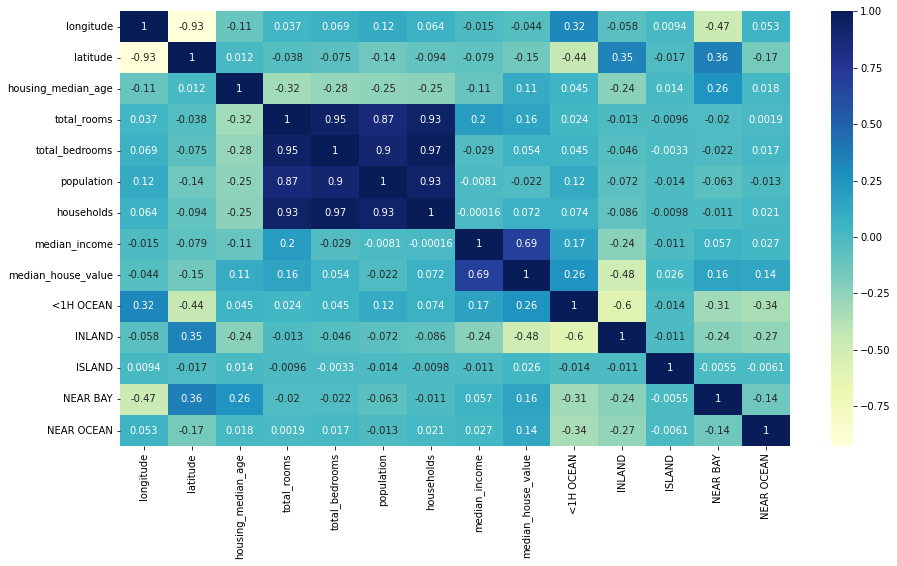

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

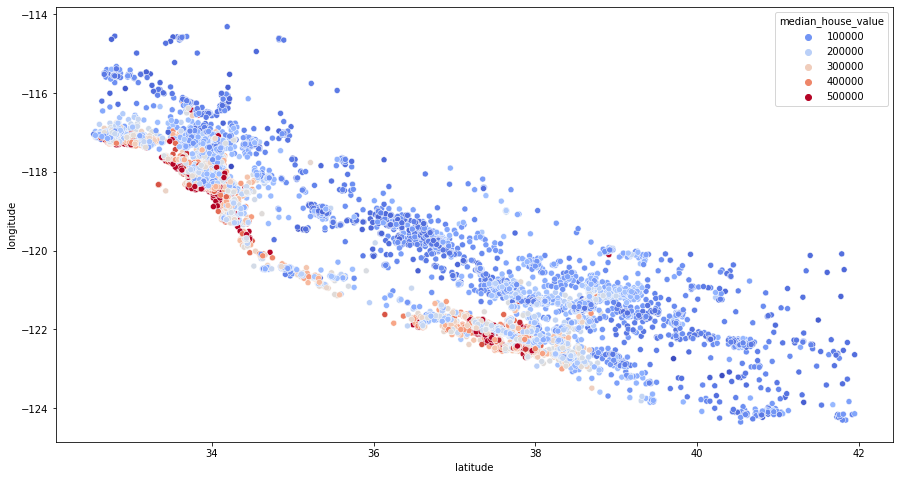

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data= train_data, hue="median_house_value", palette="coolwarm")

<AxesSubplot: >

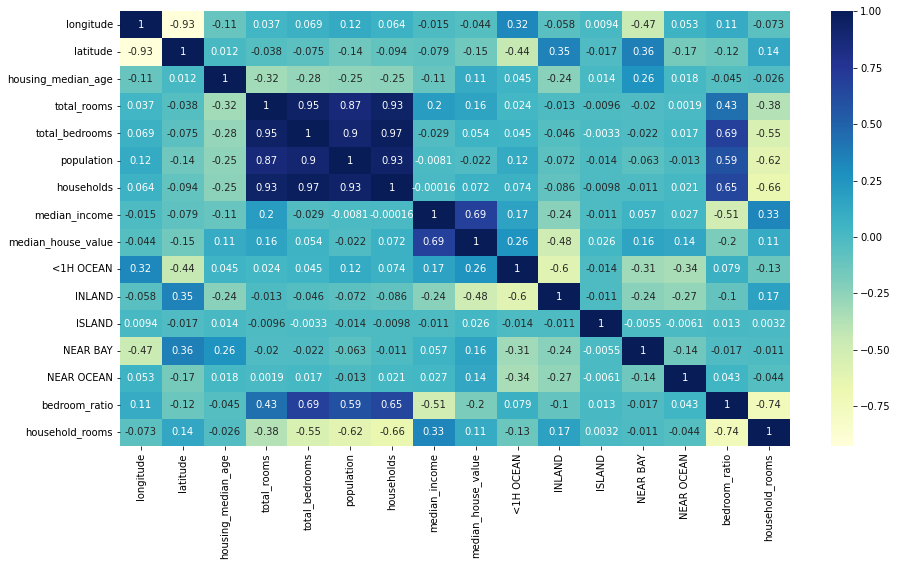

In [20]:
train_data['bedroom_ratio']= train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms']/train_data['households']
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x_train, y_train = train_data.drop(['median_house_value'], axis=1),train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)
reg = LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [23]:
test_data = X_test.join(y_test)
test_data['total_rooms']= np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms']= np.log(test_data['total_bedrooms'] + 1)
test_data['population']= np.log(test_data['population'] + 1)
test_data['households']= np.log(test_data['households'] + 1)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio']= test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']= test_data['total_rooms']/test_data['households']


In [24]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
5543,-118.40,33.98,36.0,7.834788,6.115892,6.904751,6.091310,5.6110,456600.0,1,0,0,0,0,0.780607,1.286224
5302,-118.46,34.06,46.0,7.172425,5.375278,6.180017,5.424950,7.0674,500001.0,1,0,0,0,0,0.749437,1.322118
5520,-118.39,33.97,46.0,7.695758,5.866468,6.733402,5.817111,6.5778,350800.0,1,0,0,0,0,0.762299,1.322952
12862,-121.39,38.69,30.0,7.971776,6.228511,7.319202,6.171701,3.8650,88400.0,0,1,0,0,0,0.781320,1.291666
1974,-120.66,38.61,19.0,7.906915,6.391917,7.171657,6.161207,2.5042,126400.0,0,1,0,0,0,0.808396,1.283339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17364,-120.42,34.95,33.0,8.133000,6.568078,7.365180,6.461468,3.1078,146700.0,1,0,0,0,0,0.807584,1.258692
2119,-119.73,36.74,14.0,8.732788,7.347300,8.623713,7.269617,1.6073,64700.0,0,1,0,0,0,0.841346,1.201272
5762,-118.29,34.16,31.0,7.141245,5.826000,6.927558,5.808142,3.7083,241900.0,1,0,0,0,0,0.815824,1.229523
10693,-117.73,33.61,16.0,6.381816,4.875197,5.187386,4.804021,4.8611,186800.0,1,0,0,0,0,0.763920,1.328432


In [25]:
x_test, y_test = test_data.drop(['median_house_value'], axis= 1), test_data['median_house_value']

In [29]:
x_test_s = scaler.transform(x_test)

In [27]:
reg.score(x_test, y_test)

0.6758975115136583

In [31]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [32]:
forest.score(x_test_s, y_test)

0.8241012099735112

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid={
"n_estimators":[100, 200, 300],
"min_sample_split":[2, 4],
"max_depth":[None,4,8]
}
grid_search= GridSearchCV(forest, param_grid, cv=5,
                         scoring ="neg_mean_squared_error",
                         return_train_score=True)
grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [36]:
grid_search.best_estimator_.score(x_test_s, y_test)

0.8180972370598903